<a href="https://colab.research.google.com/github/kodates/pathway_sim/blob/main/pathway_sim_colab_pub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pathway simulation

## Install libraries

In [1]:
! pip install -q condacolab
import condacolab
condacolab.install()

# The kernel will crash and restart

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
! mamba install -q numpy==1.23

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [3]:
! mamba install -q -c pysces pysces==1.1.0

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [4]:
! mamba install -q -c conda-forge assimulo

## GitHub

In [6]:
! git clone https://github.com/kodates/pathway_sim.git
! ls

Cloning into 'pathway_sim'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (22/22), 3.77 MiB | 20.11 MiB/s, done.
Resolving deltas: 100% (4/4), done.
condacolab_install.log	pathway_sim  sample_data


In [7]:
model_dir = './pathway_sim/models/'

# Simulation

## Folate: MTHFR

In [8]:
model = 'MODEL1007200000_url_mod.psc'

### Steady-state run

In [9]:
import pysces


mod_n = pysces.model(model, dir=model_dir)
mod_n.mode_integrator = 'CVODE'
#mod_n.mode_integrator = 'LSODA'
mod_n.doState()

mod = pysces.model(model, dir=model_dir)
mod.c_V_MTHFR = 0.3
mod.mode_integrator = 'CVODE'
#mod.mode_integrator = 'LSODA'
mod.doState()

Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

PySCeS defaults to matplotlib's TKagg backend if not specified                          in the user configuration file, set "matplotlib_backend = <backend>" 
Matplotlib interface loaded (pysces.plt.m)
Pitcon routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.23.5) with SciPy (1.11.3)
Assimulo CVode available
RateChar is available
Parallel scanner is available

PySCeS environment
******************
pysces.model_dir = /root/Pysces/psc
pysces.output_dir = /root/Pysces


***********************************************************************
* Welcome to PySCeS (1.1.0) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2023  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch Uni

Req: V_MATIII:1: RuntimeWarning: invalid value encountered in double_scalars


(nleq2) exits with ierr = 21
WARNING!! Negative concentrations detected.
INFO: STATE is switching to FINTSLV solver.


/usr/local/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:251: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


Using model directory: ./pathway_sim/models/
./pathway_sim/models/MODEL1007200000_url_mod.psc loading ..... 
Parsing file: ./pathway_sim/models/MODEL1007200000_url_mod.psc
Info: "Fol" has been initialised but does not occur in a rate equation
Info: "CO" has been initialised but does not occur in a rate equation
Info: "tot_cfol" has been initialised but does not occur in a rate equation
Info: "tot_mfol" has been initialised but does not occur in a rate equation
Info: "c_cys" has been initialised but does not occur in a rate equation
Info: "c_gsg" has been initialised but does not occur in a rate equation
Info: "e" has been initialised but does not occur in a rate equation
Info: "Ki_MS" has been initialised but does not occur in a rate equation
Info: "Ki_BHMT" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 

Assignment rule(s) detected.
INFO: Assignment Rules detected and Assimulo i

In [10]:
for (s, i_var, i_norm) in sorted(zip(
    mod.data_sstate.getSpecies(lbls=True)[1],
    mod.data_sstate.getSpecies(lbls=True)[0],
    mod_n.data_sstate.getSpecies(lbls=True)[0]
), key=lambda x: abs(x[1] / x[2] - 1), reverse=True):
    diff_p = (i_var / i_norm - 1) * 100
    diff = i_var - i_norm
    print(
        f'{s: <7} {i_norm: 9.3f} -> {i_var: 9.3f} \t {diff_p: 8.3f}% {diff: 8.3f}'
    )

c_thf       3.476 ->     5.118 	   47.253%    1.642
c_5mf       5.521 ->     3.226 	  -41.567%   -2.295
sam        49.276 ->    31.683 	  -35.704%  -17.594
dhf         0.035 ->     0.045 	   28.900%    0.010
c_2cf       0.462 ->     0.590 	   27.617%    0.128
src        10.370 ->    12.738 	   22.834%    2.368
c_1cf       0.259 ->     0.315 	   21.655%    0.056
dmg         0.749 ->     0.886 	   18.388%    0.138
sah        13.650 ->    15.905 	   16.523%    2.255
hcy         1.150 ->     1.338 	   16.318%    0.188
c_coo      14.390 ->    12.274 	  -14.707%   -2.116
c_10f       3.246 ->     3.705 	   14.127%    0.459
m_coo      59.582 ->    53.579 	  -10.074%   -6.003
met        53.906 ->    52.790 	   -2.070%   -1.116
c_ser     552.504 ->   545.646 	   -1.241%   -6.858
m_10f      16.034 ->    15.926 	   -0.669%   -0.107
m_2cf       1.699 ->     1.710 	    0.622%    0.011
aic         0.945 ->     0.939 	   -0.588%   -0.006
m_ser    1976.094 ->  1966.475 	   -0.487%   -9.619
m_gly    185

### time series

In [11]:
mod.mode_integrator = 'CVODE'
mod.doSim(end=5.0, points=1000)

mod_n.mode_integrator = 'CVODE'
mod_n.doSim(end=5.0, points=1000)





CVODE time for 985 points: 0.541445255279541




CVODE time for 996 points: 0.9464840888977051


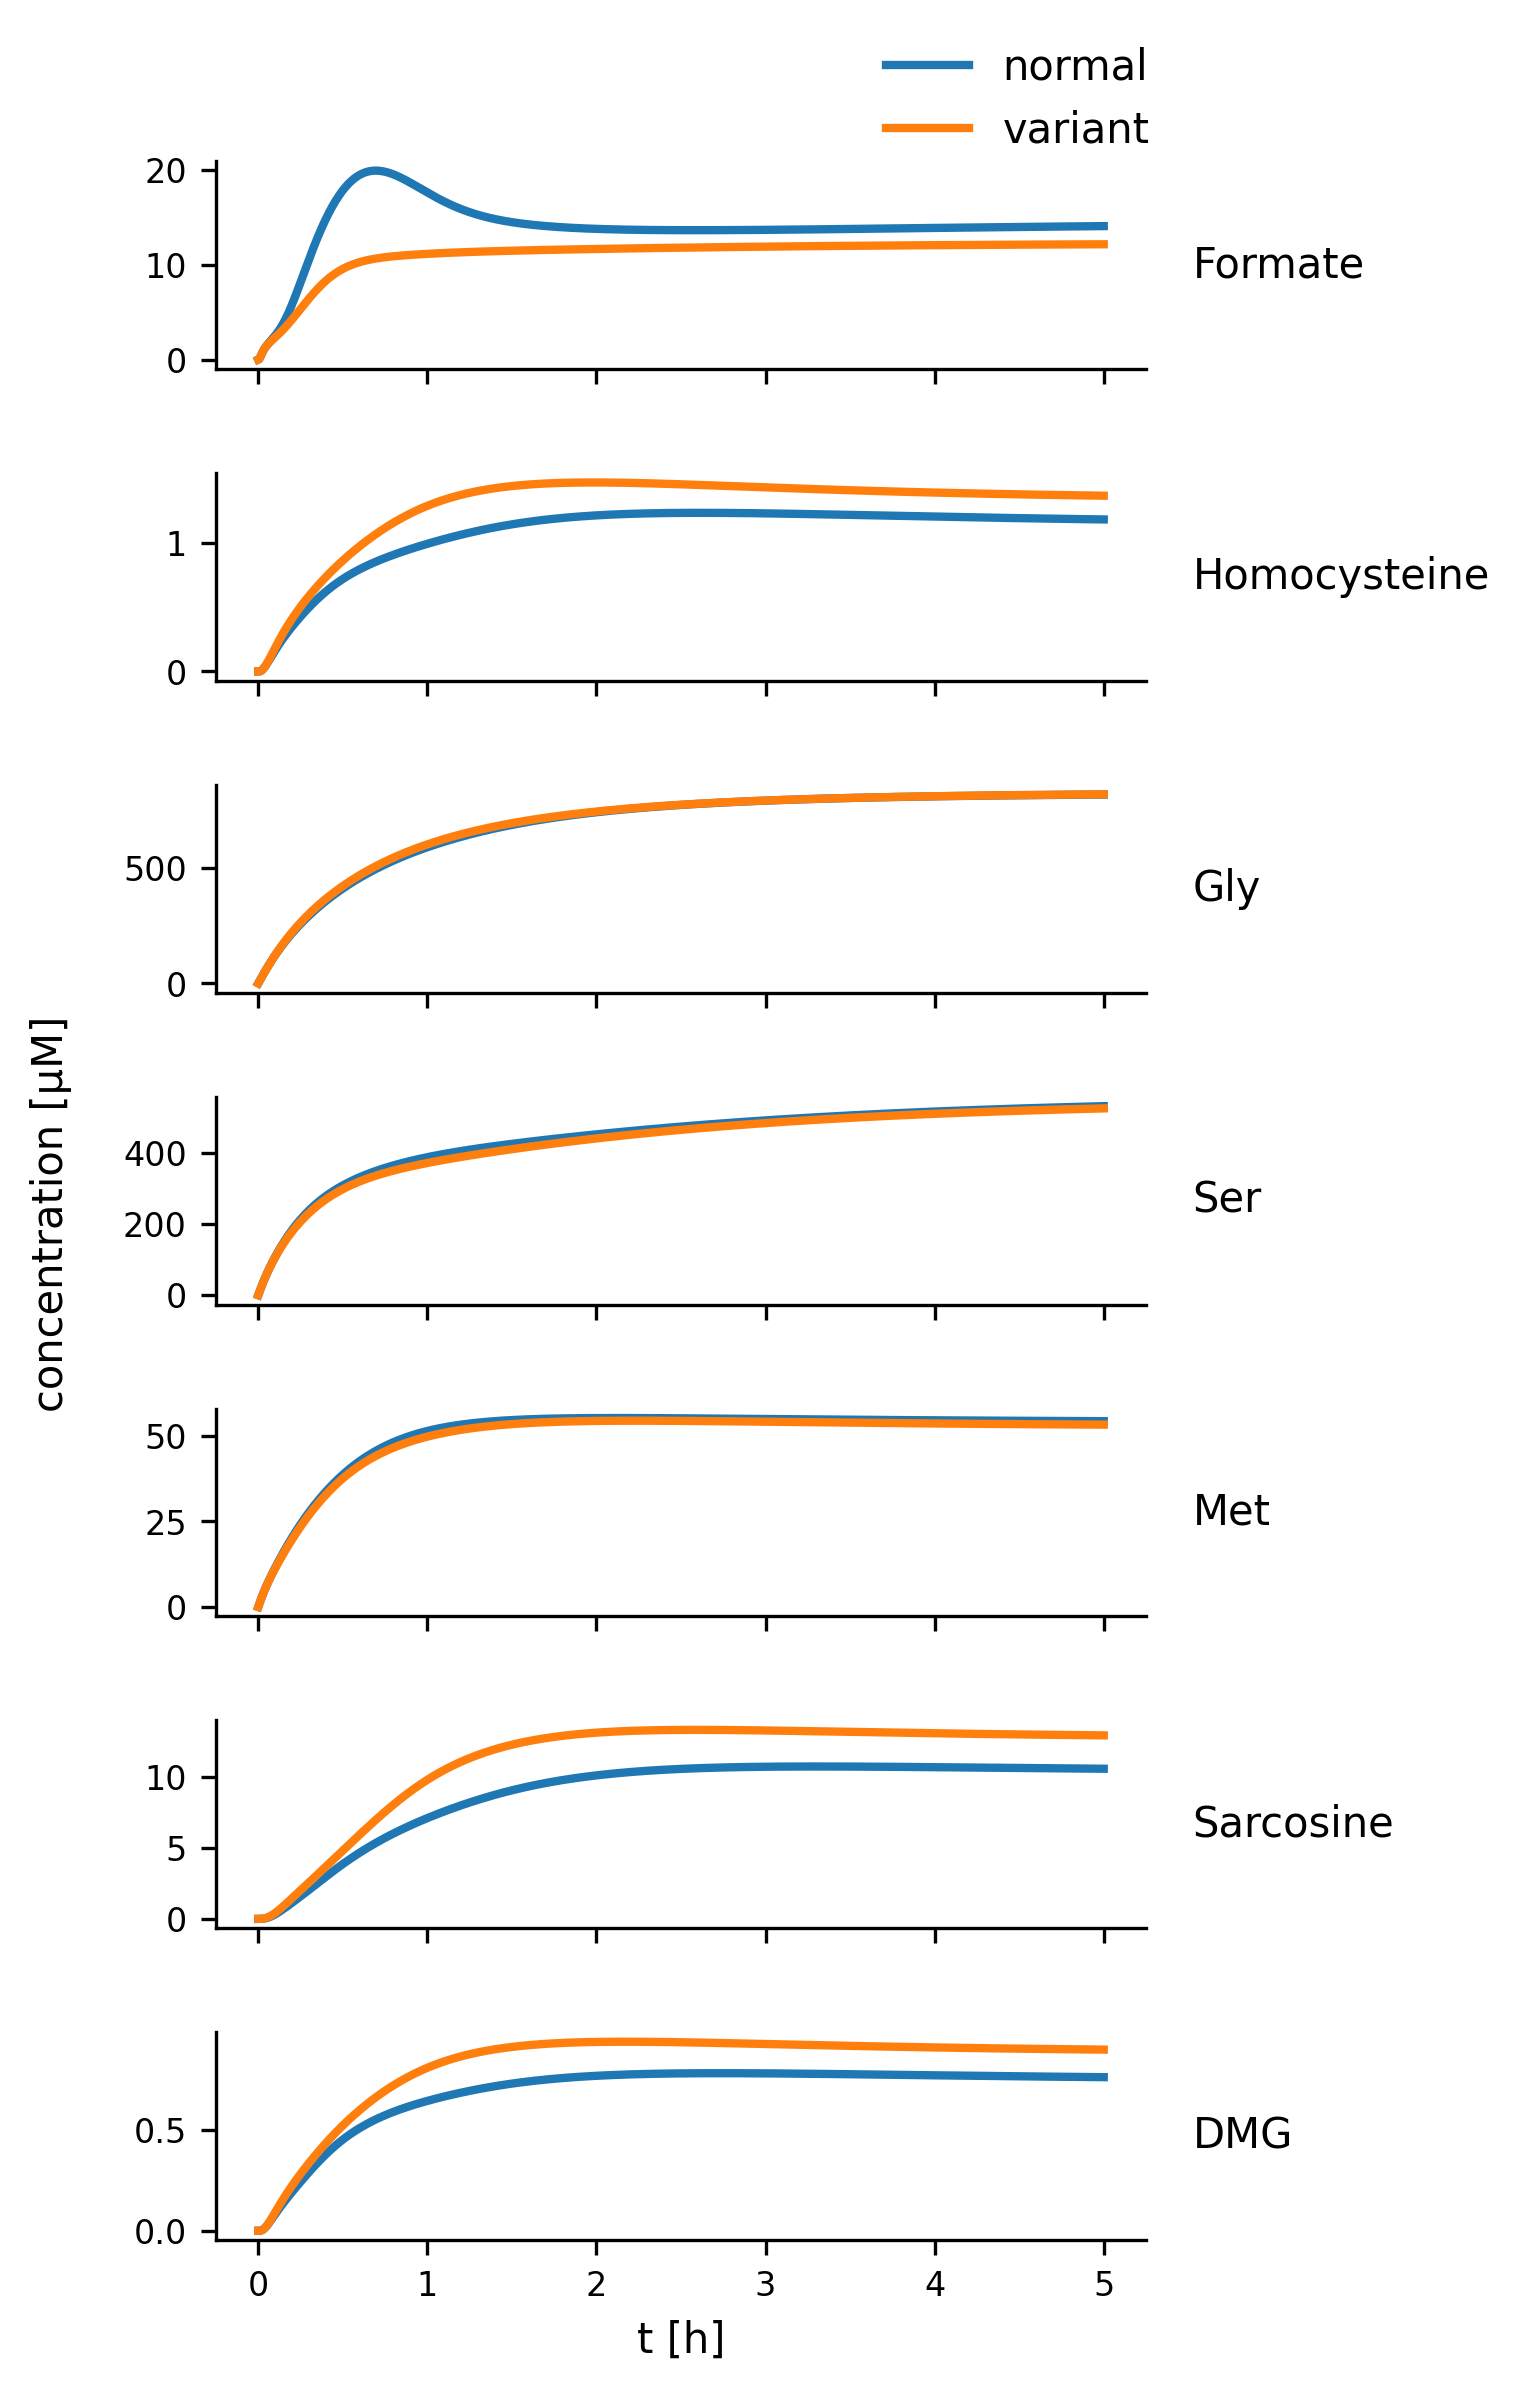

In [12]:
import matplotlib.pyplot as plt


array_sname = mod.Nmatrix.getLabels()[0]
array_t = mod.data_sim.getSpecies()[:, 0]
array_t_n = mod_n.data_sim.getSpecies()[:, 0]

#l_idx = [13, 15, 1, 2, 3, 10, 11, 22, 23]
l_idx = [13, 15, 1, 2, 3, 10, 11]
d_ylabel = {
    'c_gly': 'Gly', 'c_ser': 'Ser', 'c_coo': 'Formate', 'met': 'Met', 'sam': 'SAM',
    'sah': 'SAH', 'hcy': 'Homocysteine', 'dmg': 'DMG', 'src': 'Sarcosine'
}

fig, axes = plt.subplots(len(l_idx), 1, figsize=(4, 9), dpi=300)
fig.text(-0.03, 0.42, 'concentration [μM]', rotation=90)
fig.subplots_adjust(hspace=0.5)

for en, i in enumerate(l_idx):
    axes[en].plot(array_t_n, mod_n.data_sim.getSpecies()[:, i], label='normal', lw=2)
    axes[en].plot(array_t, mod.data_sim.getSpecies()[:, i], label='variant', lw=2)

    axes[en].yaxis.set_label_coords(1.05, 0.4)
    axes[en].set_ylabel(d_ylabel[array_sname[i - 1]], rotation=0, ha='left')

    if en == 0:
        #axes[en].legend(loc='center left', bbox_to_anchor=(1.2, 0.5), frameon=False)
        #axes[en].legend(loc='best', frameon=False)
        axes[en].legend(loc='center left', bbox_to_anchor=(0.68, 1.3), frameon=False)
        axes[en].set_xticklabels([])
    elif en == len(l_idx) - 1:
        axes[en].tick_params(axis='x', labelsize=8)
        axes[en].set_xlabel('t [h]')
    else:
        axes[en].set_xticklabels([])

    #axes[en].grid(True, ls='-', zorder=0, lw=0.3)
    axes[en].tick_params(axis='both', labelsize=8)
    axes[en].spines['top'].set_visible(False)
    axes[en].spines['right'].set_visible(False)

    #axes[en].set_xlim([-0.05, 1.5])

fig.show()

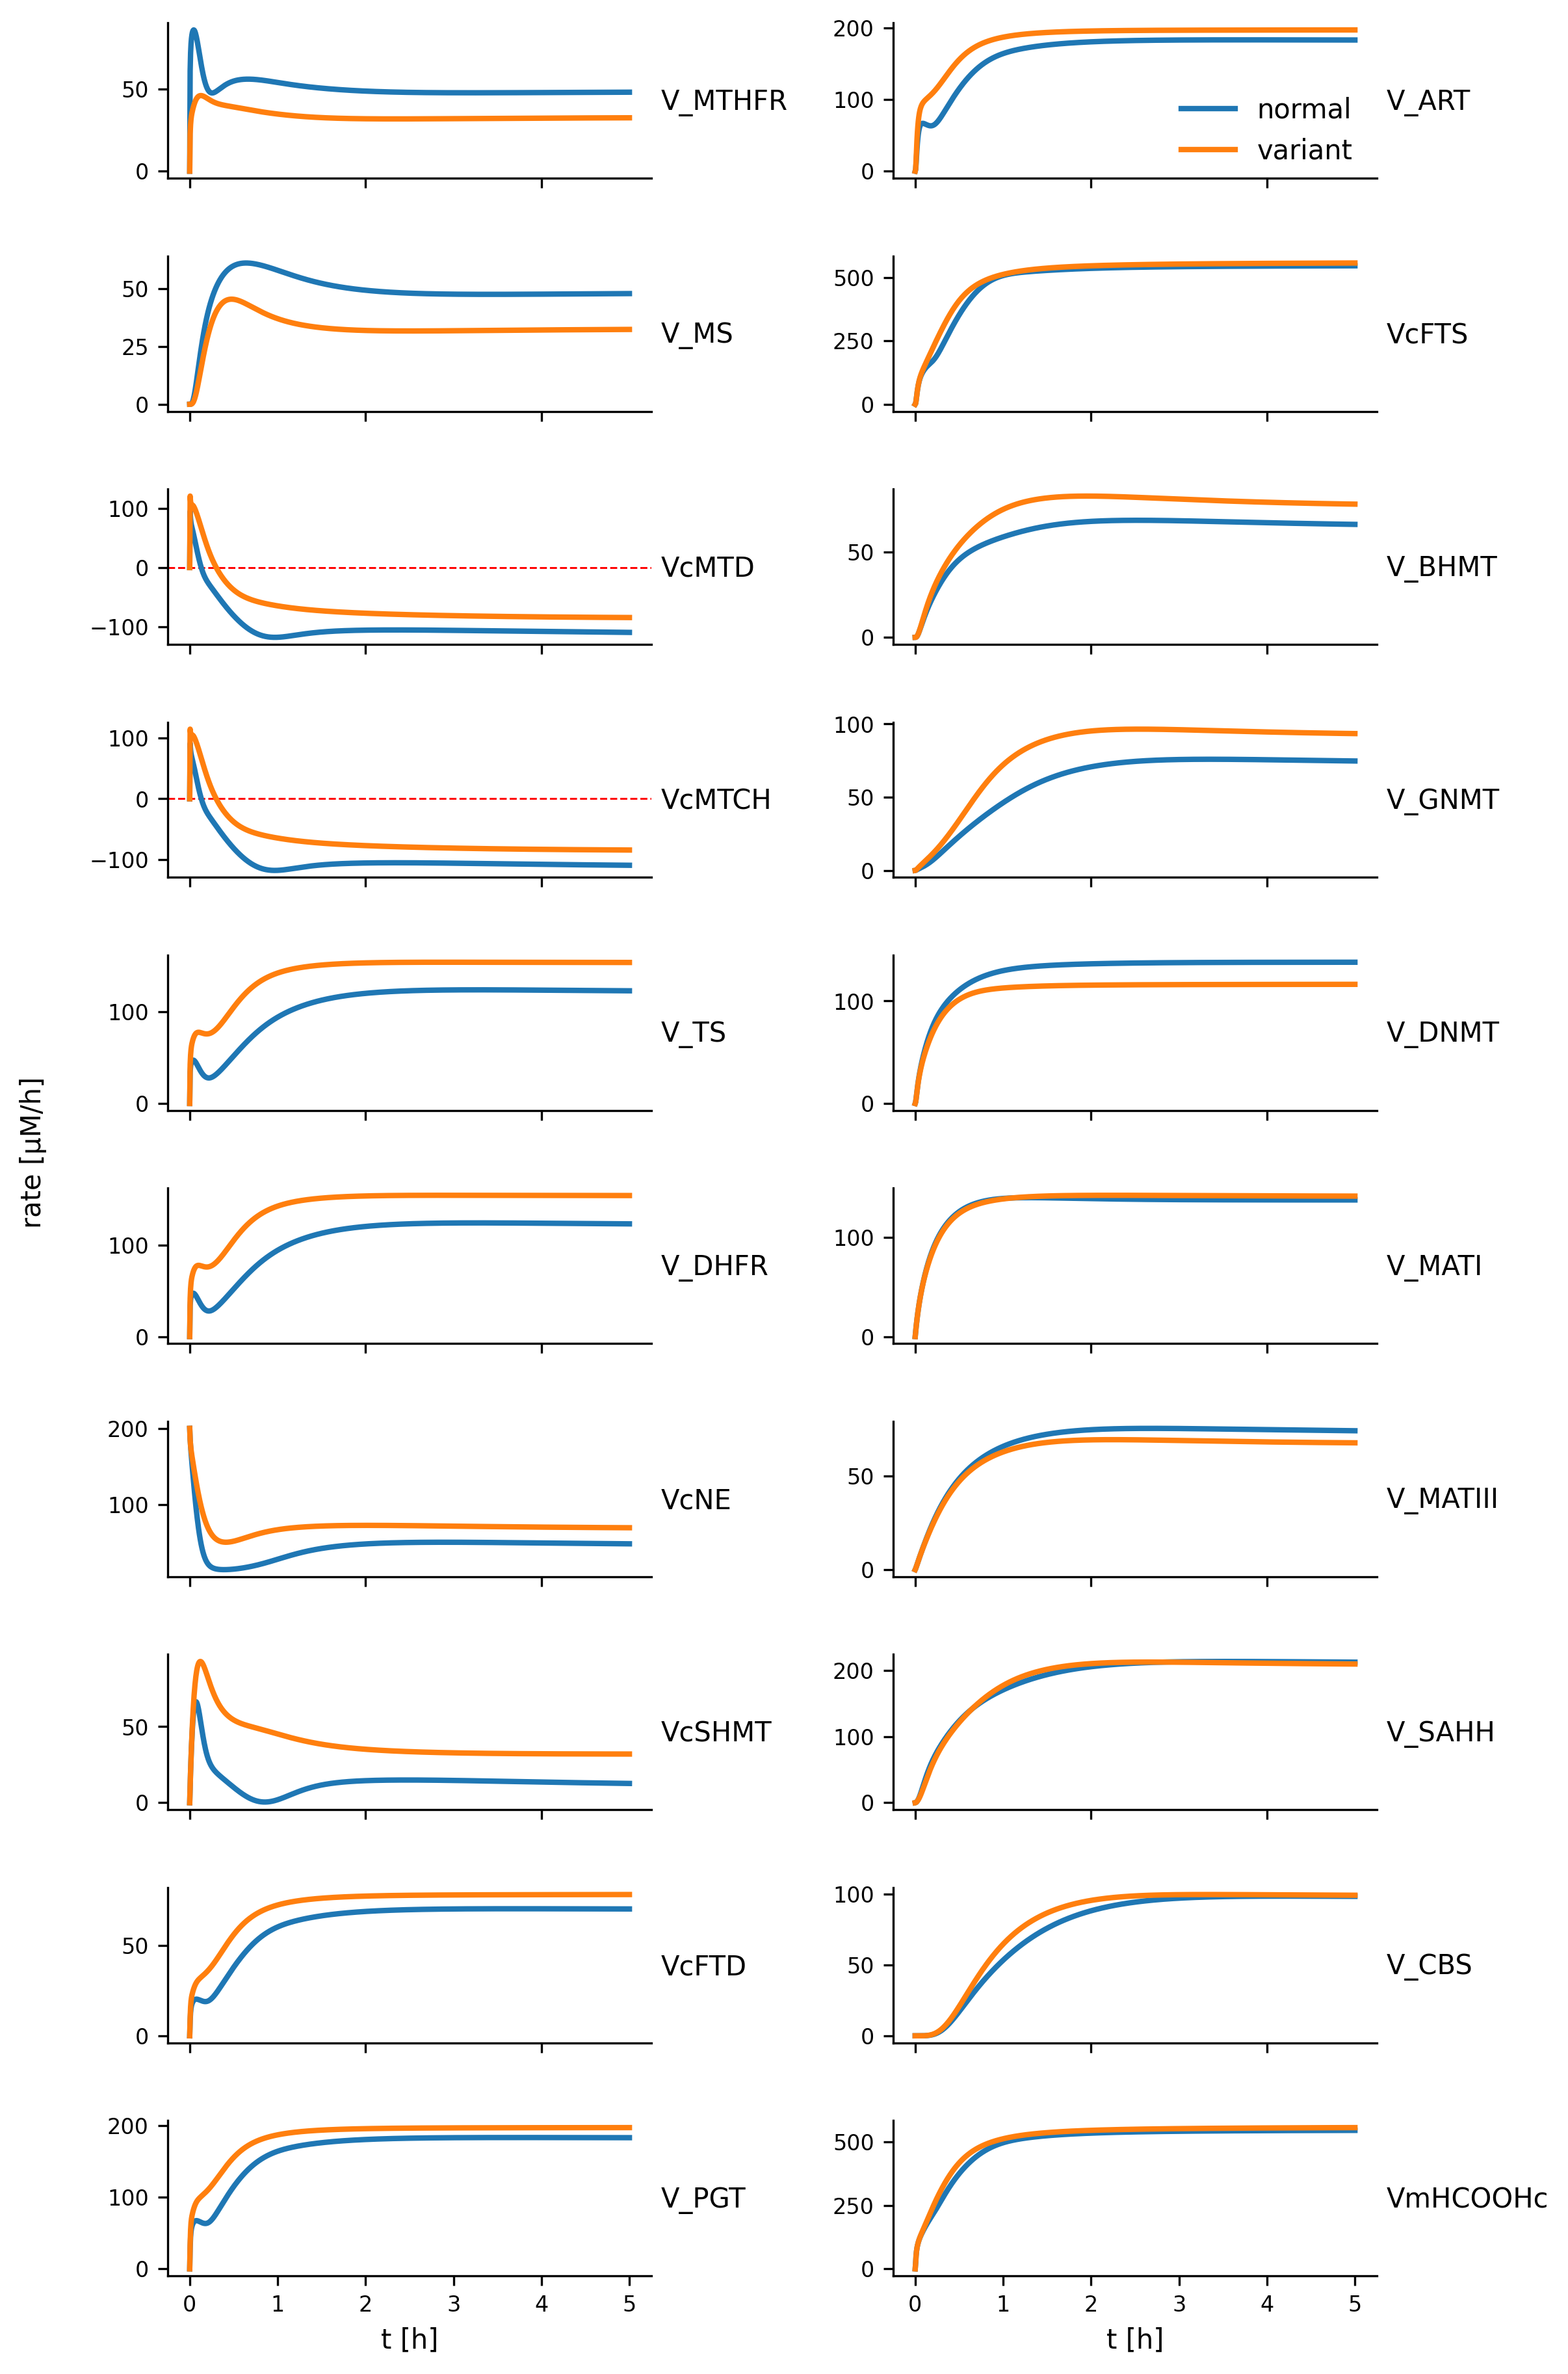

In [ ]:
import matplotlib.pyplot as plt


array_rname = mod.Nmatrix.getLabels()[1]
array_t = mod.data_sim.getSpecies()[:, 0]
array_t_n = mod_n.data_sim.getSpecies()[:, 0]

l_idx = [
    24, 16, 25, 26, 23, 17, 22, 21, 18, 19,
    27, 20, 28, 31, 32, 29, 30, 33, 35, 14
]

fig, axes = plt.subplots(len(l_idx) // 2, 2, figsize=(8, 15), dpi=300)
fig.text(0.03, 0.47, 'rate [μM/h]', rotation=90)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for en, i in enumerate(l_idx):
    ax1 = en % 10
    ax2 = en // 10

    if i == 25 or i == 26:
        axes[ax1][ax2].axhline(y=0, c='red', ls='--', lw=0.7)
    axes[ax1][ax2].plot(array_t_n, mod_n.data_sim.getRates()[:, i], label='normal', lw=2)
    axes[ax1][ax2].plot(array_t, mod.data_sim.getRates()[:, i], label='variant', lw=2)

    axes[ax1][ax2].yaxis.set_label_coords(1.02, 0.4)
    axes[ax1][ax2].set_ylabel(array_rname[i - 1], rotation=0, ha='left')

    if en == 10:
        #axes[en].legend(loc='center left', bbox_to_anchor=(1.28, 0.5), frameon=False)
        axes[ax1][ax2].legend(loc='lower right', bbox_to_anchor=(1.0, -0.07), frameon=False)
        axes[ax1][ax2].set_xticklabels([])
    elif ax1 == 9:
        axes[ax1][ax2].tick_params(axis='x', labelsize=8)
        axes[ax1][ax2].set_xlabel('t [h]')
    else:
        axes[ax1][ax2].set_xticklabels([])

    #axes[en].grid(True, ls='-', zorder=0, lw=0.3)
    axes[ax1][ax2].tick_params(axis='y', labelsize=8)
    axes[ax1][ax2].spines['top'].set_visible(False)
    axes[ax1][ax2].spines['right'].set_visible(False)

    #axes[en].set_xlim([-0.05, 1.5])

fig.show()

## All enzymes & metabolites

In [15]:
import pysces
import matplotlib.pyplot as plt
import numpy as np


def sim_grad_allvar(mod, l_name_in, l_name_out, t_scan_range):
    l_sc = []
    for k, name_in in enumerate(l_name_in):
        sc = pysces.Scanner(mod)
        sc.quietRun = True
        sc.addScanParameter(name_in, *t_scan_range)

        is_getting_v = l_name_out[0].startswith('V_')
        if is_getting_v:
            sc.addUserOutput(l_name_in[0])  # just to avoid error
        else:
            sc.addUserOutput(*l_name_out)

        sc.Run()
        l_sc.append(sc)

    return l_sc

In [17]:
mod_grad = pysces.model(model, dir=model_dir)

l_name_in = [
    'c_V_MTHFR', 'c_V_MS', 'c_VcMTD', 'c_VcMTCH', 'c_V_TS', 'c_V_DHFR', 'c_VcNE', 'c_VcSHMT',
    'c_VcFTD', 'c_V_PGT', 'c_V_ART', 'c_VcFTS', 'c_V_BHMT', 'c_V_GNMT', 'c_V_DNMT',
    'c_V_MATI', 'c_V_MATIII', 'c_V_SAHH', 'c_V_CBS'
]
l_name_out = [
    'c_gly', 'c_ser', 'c_coo',
    'met', 'sam', 'sah', 'hcy', 'dmg', 'src'
]
t_scan_range = (1.0, 0.1, 10)

l_sc = sim_grad_allvar(mod_grad, l_name_in, l_name_out, t_scan_range)

Using model directory: ./pathway_sim/models/
./pathway_sim/models/MODEL1007200000_url_mod.psc loading ..... 
Parsing file: ./pathway_sim/models/MODEL1007200000_url_mod.psc
Info: "Fol" has been initialised but does not occur in a rate equation
Info: "CO" has been initialised but does not occur in a rate equation
Info: "tot_cfol" has been initialised but does not occur in a rate equation
Info: "tot_mfol" has been initialised but does not occur in a rate equation
Info: "c_cys" has been initialised but does not occur in a rate equation
Info: "c_gsg" has been initialised but does not occur in a rate equation
Info: "e" has been initialised but does not occur in a rate equation
Info: "Ki_MS" has been initialised but does not occur in a rate equation
Info: "Ki_BHMT" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 

Assignment rule(s) detected.
INFO: Assignment Rules detected and Assimulo i

Req: V_MATIII:1: RuntimeWarning: invalid value encountered in double_scalars



SCANNER: 10 states analysed

MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

***
***


SCANNER: 10 states analysed

Bad steady states encountered at:

[[0.1]]
[10]
MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

SCANNER: 10 states analysed

MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

SCANNER: 10 states analysed

MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

SCANNER: 10 states analysed

MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

SCANNER: 10 states analysed

MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

SCANNER: 10 states analysed

MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

SCANNER: 10 states analysed

MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

SCANNER: 10 states analysed

MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

SCANNER: 10 states analysed

MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

SCANNER: 10 states analysed

MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

***
***


SCANNER: 10 states analysed

Bad steady states encountered at:

[[0.1]]
[10]
MaxMode 0
0 min 0 sec
SCANNER: Tsteps 10

SCANNER: 10 states analysed

Ma

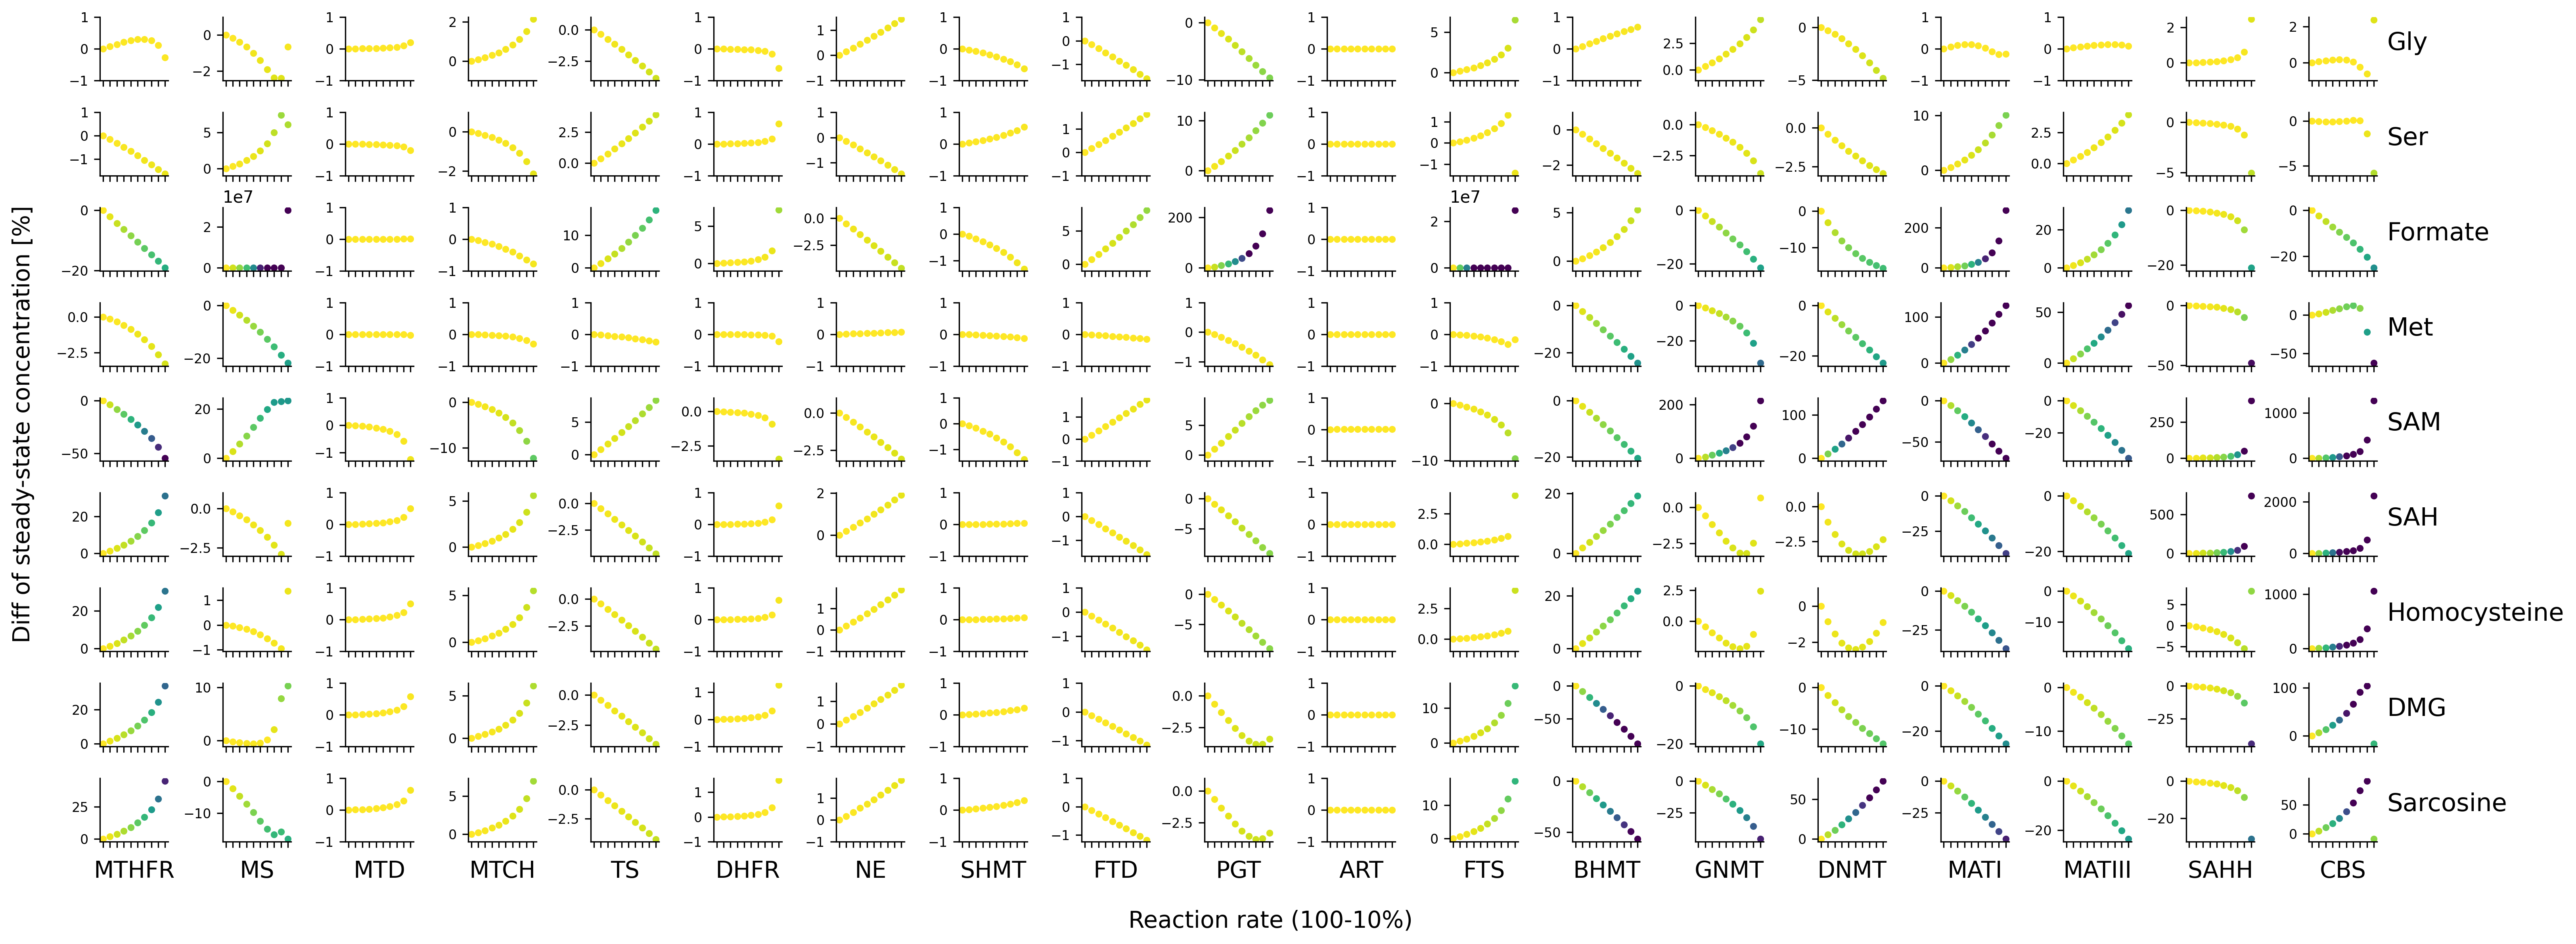

In [18]:
from matplotlib import colors


d_xlabel = {}
d_ylabel = {
    'c_gly': 'Gly', 'c_ser': 'Ser', 'c_coo': 'Formate', 'met': 'Met', 'sam': 'SAM',
    'sah': 'SAH', 'hcy': 'Homocysteine', 'dmg': 'DMG', 'src': 'Sarcosine'
}

l_name_in_label = [x[4:] for x in l_name_in]
fig, axes = plt.subplots(len(l_name_out), len(l_name_in), figsize=(len(l_name_in)*1.3, len(l_name_out)*1.0), dpi=300)
fig.text(0.095, 0.3, 'Diff of steady-state concentration [%]', rotation=90, size=14)  # ylabel
fig.text(0.475, 0.03, 'Reaction rate (100-10%)', size=14)  # xlabel
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.8)

cmap = plt.cm.viridis_r
norm = colors.Normalize(vmin=0, vmax=50)

for k, name_in in enumerate(l_name_in):
    array_t = l_sc[k].getResultMatrix()[:, 0]
    for i, name_out in enumerate(l_name_out):
        array_grad = l_sc[k].getResultMatrix()[:, i + 1][::-1]
        array_grad = (array_grad / array_grad[-1] - 1) * 100  # diff [%]

        for t, g in zip(array_t, array_grad):
            axes[i][k].scatter(t, g, s=10, zorder=2, color=cmap(norm(abs(g))))

        if k == len(l_name_in) - 1:
            axes[i][k].yaxis.set_label_coords(1.15, 0.4)
            axes[i][k].set_ylabel(d_ylabel[name_out], rotation=0, ha='left', size=15)  # substrate

        if i == len(l_name_out) - 1:
            axes[i][k].set_xlabel(l_name_in_label[k], size=14)  # enzyme
            axes[i][k].set_xticklabels([])
        else:
            axes[i][k].set_xticklabels([])

        axes[i][k].set_xticks(array_t)
        axes[i][k].tick_params(axis='both', labelsize=8)
        axes[i][k].spines['top'].set_visible(False)
        axes[i][k].spines['right'].set_visible(False)
        axes[i][k].get_yaxis().get_major_formatter().set_useOffset(False)

        ymin, ymax = axes[i][k].get_ylim()
        axes[i][k].set_ylim([min(-1, ymin), max(1, ymax)])

fig.show()

#### 50% each enzyme

In [19]:
import pysces


mod_n = pysces.model(model, dir=model_dir)
mod_n.mode_integrator = 'CVODE'
mod_n.doState()

set_m = set(['c_gly', 'c_ser', 'c_coo', 'met', 'src', 'hcy', 'dmg'])

def enz_diff(mod):
    mod.mode_integrator = 'CVODE'
    mod.quietRun = True
    mod.doState()

    for (s, i_var, i_norm) in sorted(zip(
        mod.data_sstate.getSpecies(lbls=True)[1],
        mod.data_sstate.getSpecies(lbls=True)[0],
        mod_n.data_sstate.getSpecies(lbls=True)[0]
    ), key=lambda x: x[0]):
        if s not in set_m:
            continue
        diff_p = (i_var / i_norm - 1) * 100
        diff = i_var - i_norm
        print(
            f'{s: <7} {i_norm: 9.3f} -> {i_var: 9.3f} \t {diff_p: 8.3f}% {diff: 8.3f}'
        )

Using model directory: ./pathway_sim/models/
./pathway_sim/models/MODEL1007200000_url_mod.psc loading ..... 
Parsing file: ./pathway_sim/models/MODEL1007200000_url_mod.psc
Info: "Fol" has been initialised but does not occur in a rate equation
Info: "CO" has been initialised but does not occur in a rate equation
Info: "tot_cfol" has been initialised but does not occur in a rate equation
Info: "tot_mfol" has been initialised but does not occur in a rate equation
Info: "c_cys" has been initialised but does not occur in a rate equation
Info: "c_gsg" has been initialised but does not occur in a rate equation
Info: "e" has been initialised but does not occur in a rate equation
Info: "Ki_MS" has been initialised but does not occur in a rate equation
Info: "Ki_BHMT" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 

Assignment rule(s) detected.
INFO: Assignment Rules detected and Assimulo i

Req: V_MATIII:1: RuntimeWarning: invalid value encountered in double_scalars


(nleq2) exits with ierr = 21
WARNING!! Negative concentrations detected.
INFO: STATE is switching to FINTSLV solver.


/usr/local/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:251: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


In [20]:
mod = pysces.model(model, dir=model_dir)
mod.c_V_MTHFR = 0.5
enz_diff(mod)

Using model directory: ./pathway_sim/models/
./pathway_sim/models/MODEL1007200000_url_mod.psc loading ..... 
Parsing file: ./pathway_sim/models/MODEL1007200000_url_mod.psc
Info: "Fol" has been initialised but does not occur in a rate equation
Info: "CO" has been initialised but does not occur in a rate equation
Info: "tot_cfol" has been initialised but does not occur in a rate equation
Info: "tot_mfol" has been initialised but does not occur in a rate equation
Info: "c_cys" has been initialised but does not occur in a rate equation
Info: "c_gsg" has been initialised but does not occur in a rate equation
Info: "e" has been initialised but does not occur in a rate equation
Info: "Ki_MS" has been initialised but does not occur in a rate equation
Info: "Ki_BHMT" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 

Assignment rule(s) detected.
INFO: Assignment Rules detected and Assimulo i

In [ ]:
mod = pysces.model(model, dir=model_dir)
mod.c_VcSHMT = 0.5
enz_diff(mod)

Using model directory: ./
./MODEL1007200000_url.psc loading ..... 
Parsing file: ./MODEL1007200000_url.psc
Info: "Fol" has been initialised but does not occur in a rate equation
Info: "CO" has been initialised but does not occur in a rate equation
Info: "tot_cfol" has been initialised but does not occur in a rate equation
Info: "tot_mfol" has been initialised but does not occur in a rate equation
Info: "c_cys" has been initialised but does not occur in a rate equation
Info: "c_gsg" has been initialised but does not occur in a rate equation
Info: "e" has been initialised but does not occur in a rate equation
Info: "Ki_MS" has been initialised but does not occur in a rate equation
Info: "Ki_BHMT" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 

Assignment rule(s) detected.

(NOTE: THE VALUES OF ASSIGNMENT RULES DURING THE SIMULATION CANNOT BE TRACKED WITH LSODA!)
Assimulo may be ins

In [ ]:
mod = pysces.model(model, dir=model_dir)
mod.c_V_BHMT = 0.5
enz_diff(mod)

Using model directory: ./
./MODEL1007200000_url.psc loading ..... 
Parsing file: ./MODEL1007200000_url.psc
Info: "Fol" has been initialised but does not occur in a rate equation
Info: "CO" has been initialised but does not occur in a rate equation
Info: "tot_cfol" has been initialised but does not occur in a rate equation
Info: "tot_mfol" has been initialised but does not occur in a rate equation
Info: "c_cys" has been initialised but does not occur in a rate equation
Info: "c_gsg" has been initialised but does not occur in a rate equation
Info: "e" has been initialised but does not occur in a rate equation
Info: "Ki_MS" has been initialised but does not occur in a rate equation
Info: "Ki_BHMT" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 

Assignment rule(s) detected.

(NOTE: THE VALUES OF ASSIGNMENT RULES DURING THE SIMULATION CANNOT BE TRACKED WITH LSODA!)
Assimulo may be ins

In [ ]:
mod = pysces.model(model, dir=model_dir)
mod.c_VcMTD = 0.5
enz_diff(mod)

Using model directory: ./
./MODEL1007200000_url.psc loading ..... 
Parsing file: ./MODEL1007200000_url.psc
Info: "Fol" has been initialised but does not occur in a rate equation
Info: "CO" has been initialised but does not occur in a rate equation
Info: "tot_cfol" has been initialised but does not occur in a rate equation
Info: "tot_mfol" has been initialised but does not occur in a rate equation
Info: "c_cys" has been initialised but does not occur in a rate equation
Info: "c_gsg" has been initialised but does not occur in a rate equation
Info: "e" has been initialised but does not occur in a rate equation
Info: "Ki_MS" has been initialised but does not occur in a rate equation
Info: "Ki_BHMT" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 

Assignment rule(s) detected.

(NOTE: THE VALUES OF ASSIGNMENT RULES DURING THE SIMULATION CANNOT BE TRACKED WITH LSODA!)
Assimulo may be ins

In [ ]:
mod = pysces.model(model, dir=model_dir)
mod.c_V_CBS = 0.5
enz_diff(mod)

Using model directory: ./
./MODEL1007200000_url.psc loading ..... 
Parsing file: ./MODEL1007200000_url.psc
Info: "Fol" has been initialised but does not occur in a rate equation
Info: "CO" has been initialised but does not occur in a rate equation
Info: "tot_cfol" has been initialised but does not occur in a rate equation
Info: "tot_mfol" has been initialised but does not occur in a rate equation
Info: "c_cys" has been initialised but does not occur in a rate equation
Info: "c_gsg" has been initialised but does not occur in a rate equation
Info: "e" has been initialised but does not occur in a rate equation
Info: "Ki_MS" has been initialised but does not occur in a rate equation
Info: "Ki_BHMT" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 

Assignment rule(s) detected.

(NOTE: THE VALUES OF ASSIGNMENT RULES DURING THE SIMULATION CANNOT BE TRACKED WITH LSODA!)
Assimulo may be ins

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:251: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
mod = pysces.model(model, dir=model_dir)
mod.c_V_DHFR = 0.5
enz_diff(mod)

Using model directory: ./
./MODEL1007200000_url.psc loading ..... 
Parsing file: ./MODEL1007200000_url.psc
Info: "Fol" has been initialised but does not occur in a rate equation
Info: "CO" has been initialised but does not occur in a rate equation
Info: "tot_cfol" has been initialised but does not occur in a rate equation
Info: "tot_mfol" has been initialised but does not occur in a rate equation
Info: "c_cys" has been initialised but does not occur in a rate equation
Info: "c_gsg" has been initialised but does not occur in a rate equation
Info: "e" has been initialised but does not occur in a rate equation
Info: "Ki_MS" has been initialised but does not occur in a rate equation
Info: "Ki_BHMT" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 

Assignment rule(s) detected.

(NOTE: THE VALUES OF ASSIGNMENT RULES DURING THE SIMULATION CANNOT BE TRACKED WITH LSODA!)
Assimulo may be ins

Req: V_MATIII:1: RuntimeWarning: invalid value encountered in double_scalars


INFO: (hybrd) Invalid steady state:
(hybrd) The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
WARNING!! Negative concentrations detected.
INFO: STATE is switching to NLEQ2 solver.
(nleq2) exits with ierr = 21
WARNING!! Negative concentrations detected.
INFO: STATE is switching to FINTSLV solver.
c_coo      14.390 ->    14.437 	    0.329%    0.047
c_gly     825.522 ->   825.264 	   -0.031%   -0.259
c_ser     552.504 ->   552.684 	    0.033%    0.180
dmg         0.749 ->     0.749 	    0.063%    0.000
hcy         1.150 ->     1.151 	    0.030%    0.000
met        53.906 ->    53.899 	   -0.012%   -0.006
src        10.370 ->    10.378 	    0.074%    0.008


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:251: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
mod = pysces.model(model, dir=model_dir)
mod.c_V_DNMT = 0.5
enz_diff(mod)

Using model directory: ./
./MODEL1007200000_url.psc loading ..... 
Parsing file: ./MODEL1007200000_url.psc
Info: "Fol" has been initialised but does not occur in a rate equation
Info: "CO" has been initialised but does not occur in a rate equation
Info: "tot_cfol" has been initialised but does not occur in a rate equation
Info: "tot_mfol" has been initialised but does not occur in a rate equation
Info: "c_cys" has been initialised but does not occur in a rate equation
Info: "c_gsg" has been initialised but does not occur in a rate equation
Info: "e" has been initialised but does not occur in a rate equation
Info: "Ki_MS" has been initialised but does not occur in a rate equation
Info: "Ki_BHMT" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 

Assignment rule(s) detected.

(NOTE: THE VALUES OF ASSIGNMENT RULES DURING THE SIMULATION CANNOT BE TRACKED WITH LSODA!)
Assimulo may be ins

In [ ]:
mod = pysces.model(model, dir=model_dir)
mod.c_V_MATI = 0.5
enz_diff(mod)

Using model directory: ./
./MODEL1007200000_url.psc loading ..... 
Parsing file: ./MODEL1007200000_url.psc
Info: "Fol" has been initialised but does not occur in a rate equation
Info: "CO" has been initialised but does not occur in a rate equation
Info: "tot_cfol" has been initialised but does not occur in a rate equation
Info: "tot_mfol" has been initialised but does not occur in a rate equation
Info: "c_cys" has been initialised but does not occur in a rate equation
Info: "c_gsg" has been initialised but does not occur in a rate equation
Info: "e" has been initialised but does not occur in a rate equation
Info: "Ki_MS" has been initialised but does not occur in a rate equation
Info: "Ki_BHMT" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 

Assignment rule(s) detected.

(NOTE: THE VALUES OF ASSIGNMENT RULES DURING THE SIMULATION CANNOT BE TRACKED WITH LSODA!)
Assimulo may be ins

Req: V_MATIII:1: RuntimeWarning: invalid value encountered in double_scalars


(nleq2) exits with ierr = 21
WARNING!! Negative concentrations detected.
INFO: STATE is switching to FINTSLV solver.
c_coo      14.390 ->    18.469 	   28.344%    4.079
c_gly     825.522 ->   826.318 	    0.096%    0.795
c_ser     552.504 ->   573.371 	    3.777%   20.867
dmg         0.749 ->     0.656 	  -12.423%   -0.093
hcy         1.150 ->     0.945 	  -17.866%   -0.206
met        53.906 ->    83.372 	   54.663%   29.466
src        10.370 ->     8.016 	  -22.702%   -2.354


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:251: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)
